<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%93%D0%B5%D0%B9%D0%BC%D1%81-%D0%A5%D0%B0%D1%83%D1%8D%D0%BB%D0%BB%20%D0%B4%D0%BB%D1%8F%20%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D0%BD%D1%82%D0%B0%20%D1%81%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D1%8B%D1%85%20%D1%81%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import pingouin as pg
import numpy as np

# Устанавливаем стоп-слова для русского языка
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Функция для очистки текста от тегов, [unclear] и приведения к нижнему регистру
def clean_text(text):
    # Удаляем теги
    cleaned_text = re.sub(r'<[^>]+>|', '', text)
    # Приводим к нижнему регистру и токенизируем текст
    words = word_tokenize(cleaned_text.lower(), language='russian')
    return words

# Базовая директория
base_directory = "/content/Students_texts"
cefr_levels = ['A1', 'A2', 'B1', 'B2']

# Списки для хранения данных
cefr_level_list = []
file_names_list = []
functional_words_percent_list = []
functional_words_percent_all = []

for cefr_level in cefr_levels:
    level_directory = os.path.join(base_directory, cefr_level)

    for filename in os.listdir(level_directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(level_directory, filename)
            with open(filepath, "r", encoding="utf-8") as file:
                text = file.read()
                words = clean_text(text)

                functional_words = [word for word in words if word in stop_words]
                percent_functional_words = (len(functional_words) / len(words)) * 100
                functional_words_percent_all.append(percent_functional_words)

                # Append the data to the lists
                cefr_level_list.append(cefr_level)
                file_names_list.append(filename)
                functional_words_percent_list.append(percent_functional_words)

# Создаем DataFrame
data = pd.DataFrame({
    'CEFR Level': cefr_level_list,
    'File Name': file_names_list,
    'Functional Words Percent': functional_words_percent_list
})

# ANOVA
anova_result = pg.anova(data, dv='Functional Words Percent', between='CEFR Level')

# Тест Геймса-Хауэлла
games_howell_result = pg.pairwise_gameshowell(data, dv='Functional Words Percent', between='CEFR Level')

# Вывод результатов
print(f"F-статистика (ANOVA): {anova_result['F'][0]}")
print(f"p-value (ANOVA): {anova_result['p-unc'][0]}")

print("\nGames-Howell Test Results:")
print(games_howell_result)

# Считаем статистики для процента функциональных слов во всех файлах
mean_functional_words_percent_all = np.mean(functional_words_percent_all)
sd_functional_words_percent_all = np.std(functional_words_percent_all)
std_error_functional_words_percent_all = np.std(functional_words_percent_all) / np.sqrt(len(functional_words_percent_all))
ci_functional_words_percent_all = pg.compute_bootci(functional_words_percent_all, func=np.mean)

# Выводим статистики
print("Статистики для процента функциональных слов во всех файлах:")
print(f"Mean: {mean_functional_words_percent_all}")
print(f"SD: {sd_functional_words_percent_all}")
print(f"Std. Error: {std_error_functional_words_percent_all}")
print(f"95% CI (confidence interval) (mean): {ci_functional_words_percent_all}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


F-статистика (ANOVA): 7.389243974249937
p-value (ANOVA): 6.662246595098061e-05

Games-Howell Test Results:
    A   B    mean(A)    mean(B)      diff        se         T          df  \
0  A1  A2  31.771854  33.754033 -1.982178  1.328055 -1.492542   68.760233   
1  A1  B1  31.771854  32.699529 -0.927675  1.313147 -0.706452   65.743016   
2  A1  B2  31.771854  31.295963  0.475891  1.345176  0.353776   72.173309   
3  A2  B1  33.754033  32.699529  1.054504  0.373078  2.826499  822.197506   
4  A2  B2  33.754033  31.295963  2.458070  0.473637  5.189777  308.758422   
5  B1  B2  32.699529  31.295963  1.403566  0.430064  3.263621  227.947005   

       pval    hedges  
0  0.447518 -0.287615  
1  0.894190 -0.161240  
2  0.984694  0.069671  
3  0.024830  0.189278  
4  0.000002  0.419809  
5  0.006908  0.298329  
Статистики для процента функциональных слов во всех файлах:
Mean: 32.90479448568593
SD: 5.845906140618496
Std. Error: 0.1765015503324399
95% CI (confidence interval) (mean): [32.57 33.2

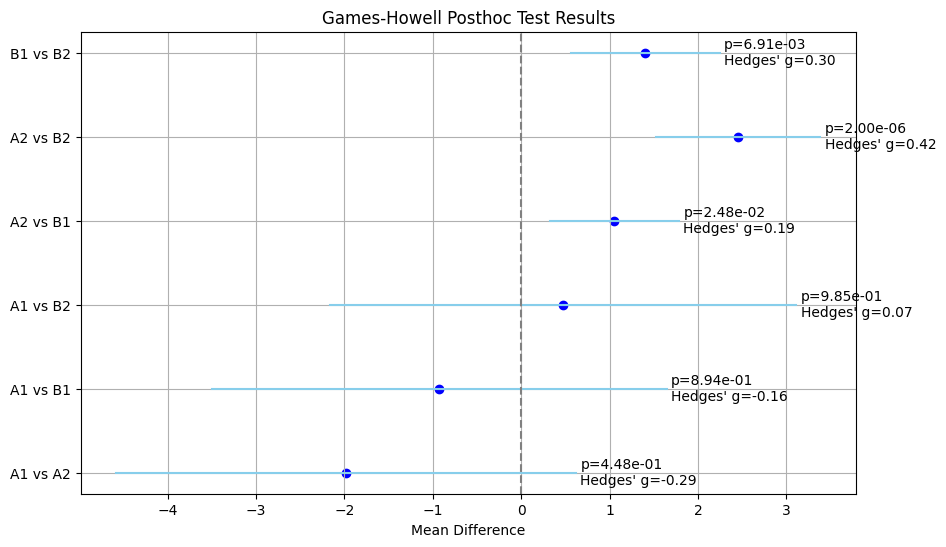

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Your Games-Howell Test Results
games_howell_result = pd.DataFrame({
    'A': ['A1', 'A1', 'A1', 'A2', 'A2', 'B1'],
    'B': ['A2', 'B1', 'B2', 'B1', 'B2', 'B2'],
    'mean(A)': [31.771854, 31.771854, 31.771854, 33.754033, 33.754033, 32.699529],
    'mean(B)': [33.754033, 32.699529, 31.295963, 32.699529, 31.295963, 31.295963],
    'diff': [-1.982178, -0.927675, 0.475891, 1.054504, 2.458070, 1.403566],
    'se': [1.328055, 1.313147, 1.345176, 0.373078, 0.473637, 0.430064],
    'T': [-1.492542, -0.706452, 0.353776, 2.826499, 5.189777, 3.263621],
    'df': [68.760233, 65.743016, 72.173309, 822.197506, 308.758422, 227.947005],
    'pval': [0.447518, 0.894190, 0.984694, 0.024830, 0.000002, 0.006908],
    'hedges': [-0.287615, -0.161240, 0.069671, 0.189278, 0.419809, 0.298329]
})

# Расчет доверительных интервалов
z_score = 1.96
conf_intervals = [
    (md - z_score * s, md + z_score * s) for md, s in zip(games_howell_result['diff'], games_howell_result['se'])
]

# Построение графика
plt.figure(figsize=(10, 6))
for i, (group, ci, p, h) in enumerate(
    zip(games_howell_result['A'] + ' vs ' + games_howell_result['B'], conf_intervals, games_howell_result['pval'], games_howell_result['hedges'])
):
    plt.plot(ci, [i, i], color="skyblue")
    plt.scatter(games_howell_result['diff'].iloc[i], i, color="blue")
    plt.text(ci[1] + 0.05, i, f"p={p:.2e}\nHedges' g={h:.2f}", va='center')

# Элементы оформления
plt.yticks(range(len(games_howell_result)), games_howell_result['A'] + ' vs ' + games_howell_result['B'])
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel("Mean Difference")
plt.title("Games-Howell Posthoc Test Results")
plt.grid(True)
plt.show()